In [1]:
import pandas as pd
df = pd.read_csv('exoplanets.csv', nrows=400)

In [2]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:
df['LABEL'].value_counts()

1    363
2     37
Name: LABEL, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

X = df.iloc[:,1:]
y = df.iloc[:,0]

def light_plot(index):
    y_vals = X.iloc[index]
    x_vals = np.arange(len(y_vals))
    plt.figure(figsize=(15,8))
    plt.xlabel('Number of Observations')
    plt.ylabel('Light Flux')
    plt.title('Light Plot ' + str(index), size=15)
    plt.plot(x_vals, y_vals)
    plt.show()

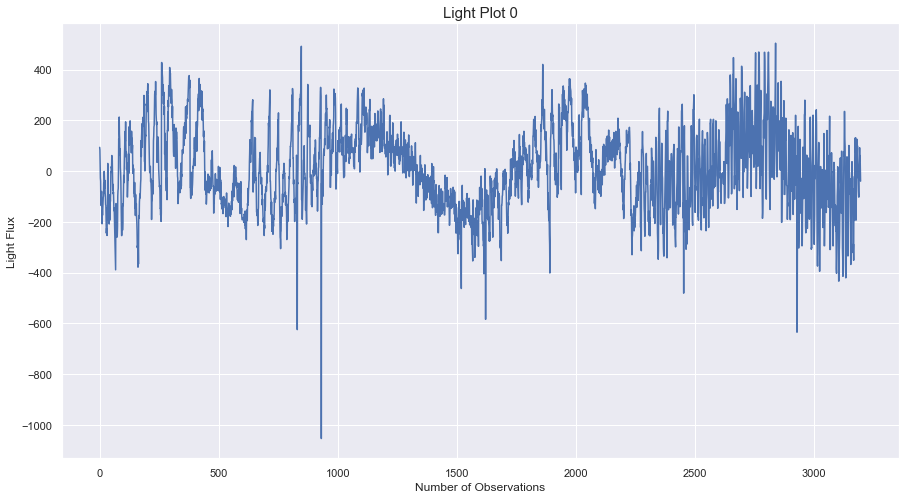

In [5]:
light_plot(0)

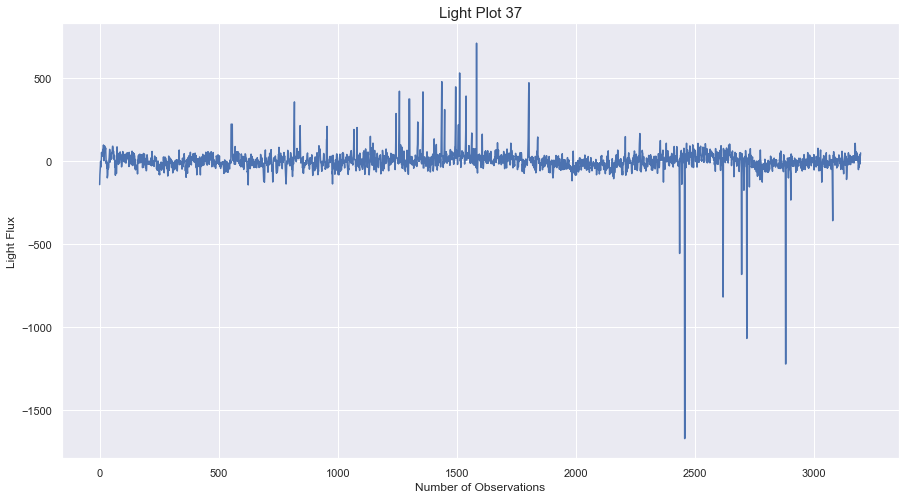

In [6]:
light_plot(37)

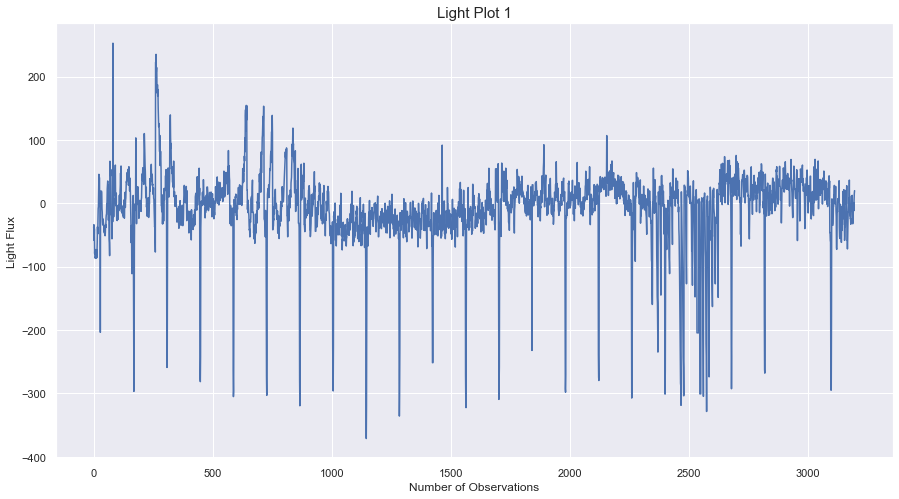

In [7]:
light_plot(1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 9.8 MB


In [9]:
# Sum null values
df.isnull().sum().sum()

0

In [10]:
# Import XGBRegressor
from xgboost import XGBClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [11]:
# Instantiate the XGBRegressor, xg_reg
model = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2)

# Fit xg_reg to training set
model.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = model.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score))

Score: 0.88


In [12]:
len(y_test[y_test==1])

88

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[86,  2],
       [10,  2]])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.98      0.93        88
           2       0.50      0.17      0.25        12

    accuracy                           0.88       100
   macro avg       0.70      0.57      0.59       100
weighted avg       0.85      0.88      0.85       100



In [15]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, pos_label=2)

0.16666666666666666

In [16]:
def xgb_clf(model, nrows):

    df = pd.read_csv('exoplanets.csv', nrows=nrows)
    # Split data into X and y
    X = df.iloc[:,1:]
    y = df.iloc[:,0]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

    # Fit xg_reg to training set
    model.fit(X_train, y_train)

    # Predict labels of test set, y_pred
    y_pred = model.predict(X_test)

    score = recall_score(y_test, y_pred, pos_label=2)
    
    print(confusion_matrix(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
        
    return score

In [17]:
xgb_clf(XGBClassifier(random_state=2), nrows=800)

[[190   0]
 [  9   1]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.98       190
           2       1.00      0.10      0.18        10

    accuracy                           0.95       200
   macro avg       0.98      0.55      0.58       200
weighted avg       0.96      0.95      0.94       200



0.1

In [18]:
xgb_clf(XGBClassifier(random_state=2), nrows=200)

[[36  1]
 [ 8  5]]
              precision    recall  f1-score   support

           1       0.82      0.97      0.89        37
           2       0.83      0.38      0.53        13

    accuracy                           0.82        50
   macro avg       0.83      0.68      0.71        50
weighted avg       0.82      0.82      0.79        50



0.38461538461538464

In [19]:
xgb_clf(XGBClassifier(random_state=2), nrows=74)

[[6 2]
 [3 8]]
              precision    recall  f1-score   support

           1       0.67      0.75      0.71         8
           2       0.80      0.73      0.76        11

    accuracy                           0.74        19
   macro avg       0.73      0.74      0.73        19
weighted avg       0.74      0.74      0.74        19



0.7272727272727273

In [20]:
df_train = pd.merge(y_train, X_train, left_index=True, right_index=True)

In [21]:
newdf = pd.DataFrame(np.repeat(df_train[df_train['LABEL']==2].values,9,axis=0))
newdf.columns = df_train.columns
df_train_resample = pd.concat([df_train, newdf])

df_train_resample['LABEL'].value_counts()

1.0    275
2.0    250
Name: LABEL, dtype: int64

In [22]:
X_train_resample = df_train_resample.iloc[:,1:]
y_train_resample = df_train_resample.iloc[:,0]

In [23]:
# Instantiate the XGBRegressor, xg_reg
model = XGBClassifier(random_state=2)

# Fit xg_reg to training set
model.fit(X_train_resample, y_train_resample)

# Predict labels of test set, y_pred
y_pred = model.predict(X_test)

score = recall_score(y_test, y_pred, pos_label=2)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(score)

[[87  1]
 [ 8  4]]
              precision    recall  f1-score   support

           1       0.92      0.99      0.95        88
           2       0.80      0.33      0.47        12

    accuracy                           0.91       100
   macro avg       0.86      0.66      0.71       100
weighted avg       0.90      0.91      0.89       100

0.3333333333333333


In [24]:
df['LABEL'] = df['LABEL'].replace(1, 0)
df['LABEL'] = df['LABEL'].replace(2, 1)

df['LABEL'].value_counts()

0    363
1     37
Name: LABEL, dtype: int64

In [25]:
# Split data into X and y
X = df.iloc[:,1:]
y = df.iloc[:,0]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [26]:
model = XGBClassifier(scale_pos_weight=10, random_state=2)

model.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = model.predict(X_test)

score = recall_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(score)

[[87  1]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        88
           1       0.80      0.33      0.47        12

    accuracy                           0.91       100
   macro avg       0.86      0.66      0.71       100
weighted avg       0.90      0.91      0.89       100

0.3333333333333333


In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

In [28]:
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2)

model = XGBClassifier(scale_pos_weight=10, random_state=2)

# Obtain scores of cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='recall')

# Display accuracy
print('Recall: ', scores)

# Display mean accuracy
print('Recall mean: ', scores.mean())

Recall:  [0.15789474 0.22222222]
Recall mean:  0.19005847953216373


In [29]:
def grid_search(params, random=False, X=X, y=y, model=XGBClassifier(random_state=2, scale_pos_weight=10)): 
    
    xgb = model
    
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_jobs=-1, random_state=2, scoring='recall')
    else:
        # Instantiate GridSearchCV as grid_reg
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1, scoring='recall')
    
    # Fit grid_reg on X_train and y_train
    grid.fit(X, y)

    # Extract best params
    best_params = grid.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = grid.best_score_

    # Print best score
    print("Best score: {:.5f}".format(best_score))

In [30]:
grid_search(params={'n_estimators':[50, 200, 400, 800]})

Best params: {'n_estimators': 50}
Best score: 0.19006


In [31]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.2, 0.3]})

Best params: {'learning_rate': 0.01}
Best score: 0.35088


In [32]:
grid_search(params={'max_depth':[1, 2, 4, 8]})

Best params: {'max_depth': 1}
Best score: 0.26901


In [33]:
grid_search(params={'subsample':[0.3, 0.5, 0.7, 0.9]})

Best params: {'subsample': 0.3}
Best score: 0.19152


In [34]:
grid_search(params={'gamma':[0.05, 0.1, 0.5, 1]})

Best params: {'gamma': 1}
Best score: 0.21784


In [35]:
grid_search(params={'learning_rate':[0.0001, 0.001, 0.01], 'max_depth':[1, 2], 'gamma':[0.5, 1, 2]})

Best params: {'gamma': 0.5, 'learning_rate': 0.0001, 'max_depth': 2}
Best score: 0.53509


In [36]:
grid_search(params={'max_delta_step':[1, 3, 5, 7]})

Best params: {'max_delta_step': 1}
Best score: 0.19152


In [37]:
grid_search(params={'subsample':[0.3, 0.6, 1], 'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 'colsample_bynode':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1]}, random=True)

Best params: {'subsample': 1, 'colsample_bytree': 1, 'colsample_bynode': 0.9, 'colsample_bylevel': 0.5}
Best score: 0.24415


In [38]:
X_short = X.iloc[:74, :]
y_short = y.iloc[:74]

In [39]:
grid_search(params={'max_depth':[1, 2, 3], 'colsample_bynode':[0.5, 0.75, 1]}, X=X_short, y=y_short, 
            model=XGBClassifier(random_state=2))

Best params: {'colsample_bynode': 0.5, 'max_depth': 2}
Best score: 0.67836


In [40]:
df_all = pd.read_csv('exoplanets.csv')
df_all['LABEL'] = df_all['LABEL'].replace(1, 0)
df_all['LABEL'] = df_all['LABEL'].replace(2, 1)

X_all = df_all.iloc[:,1:]
y_all = df_all.iloc[:,0]

In [41]:
df_all['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [42]:
weight = int(5050/37)

In [43]:
model = XGBClassifier(scale_pos_weight=weight, random_state=2)

# Obtain scores of cross-validation
scores = cross_val_score(model, X_all, y_all, cv=kfold, scoring='recall')

# Display accuracy
print('Recall:', scores)

# Display mean accuracy
print('Recall mean:', scores.mean())

Recall: [0.10526316 0.        ]
Recall mean: 0.05263157894736842


In [44]:
grid_search(params={'learning_rate':[0.0001, 0.001]}, X=X_all, y=y_all, model=XGBClassifier(scale_pos_weight=weight, random_state=2))

Best params: {'learning_rate': 0.0001}
Best score: 0.40205


In [45]:
grid_search(params={'max_depth':[1, 2],'learning_rate':[0.001]}, X=X_all, y=y_all, 
            model=XGBClassifier(scale_pos_weight=weight, random_state=2))

Best params: {'learning_rate': 0.001, 'max_depth': 2}
Best score: 0.53509


In [46]:
def final_model(X, y, model):
    model.fit(X, y)
    y_pred = model.predict(X_all)
    score = recall_score(y_all, y_pred)
    print(score)
    print(confusion_matrix(y_all, y_pred))
    print(classification_report(y_all, y_pred))

In [47]:
final_model(X_short, y_short, XGBClassifier(max_depth=2, colsample_by_node=0.5, random_state=2))

1.0
[[3522 1528]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      5050
           1       0.02      1.00      0.05        37

    accuracy                           0.70      5087
   macro avg       0.51      0.85      0.43      5087
weighted avg       0.99      0.70      0.82      5087



In [48]:
final_model(X, y, XGBClassifier(max_depth=2, colsample_bynode=0.5, scale_pos_weight=10, random_state=2))

1.0
[[4839  211]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5050
           1       0.15      1.00      0.26        37

    accuracy                           0.96      5087
   macro avg       0.57      0.98      0.62      5087
weighted avg       0.99      0.96      0.97      5087



In [49]:
final_model(X_all, y_all, XGBClassifier(max_depth=2, colsample_bynode=0.5, scale_pos_weight=weight, random_state=2))

1.0
[[5039   11]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5050
           1       0.77      1.00      0.87        37

    accuracy                           1.00      5087
   macro avg       0.89      1.00      0.93      5087
weighted avg       1.00      1.00      1.00      5087



In [50]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Darwin-19.6.0-x86_64-i386-64bit
Python 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
NumPy 1.18.1
SciPy 1.4.1
Scikit-Learn 0.22.1
